# RICE LEAF DISEASE PREDICTION

## Problem Statement:


The objective of this project is to create a model capable of precisely categorizing three primary diseases affecting rice plants: leaf smut, bacterial blight, and brown spot. To attain this goal, the project encompasses tasks such as data analysis, model development, and exploration of diverse techniques, including data augmentation, to enhance the model's accuracy.

## Data Analysis
The dataset for RiceLeaf disease detection comprises of 119 images depicting rice leaves affected by three major diseases: leaf smut, bacterial blight, and brown spot. The dataset encompasses a total of X images distributed among Y classes.

#### Bacterial Leaf Blight:
* Overview: Bacterial leaf blight, attributed to the bacterium Xanthomonas oryzae pv. oryzae, is a prevalent disease affecting rice leaves. It induces water-soaked lesions that progress to a brown hue, leading to tissue death.

* Symptoms: Manifestations include elongated water-soaked lesions on leaves, often encircled by a yellow halo. As the disease advances, lesions expand, coalesce, and result in leaf wilting and necrosis.

* Impact: Untreated bacterial leaf blight can markedly diminish rice yield and quality, spreading through rain, wind, and contaminated tools.

* Prevention and Management: Strategies involve utilizing disease-resistant rice varieties, adopting crop rotation, and minimizing overhead irrigation to curtail disease transmission.

#### Brown Spot:
* Overview: Brown spot, caused by the fungus Bipolaris oryzae, is another prevalent rice disease affecting leaves. It leads to small, circular to elliptical spots with dark brown centers and yellow halos.

* Symptoms: Initial symptoms comprise small, water-soaked lesions that evolve into brown patches. Lesions may merge, resulting in larger, irregularly shaped areas of dead tissue.

* Impact: Brown spot can hinder photosynthesis, adversely affecting plant health and yield, particularly in warm and humid conditions.

* Prevention and Management: Effective measures include using disease-resistant varieties, practicing proper field hygiene, and mitigating water stress.

#### Leaf Smut:
* Overview: Leaf smut, caused by the fungus Entyloma oryzae, impacts rice leaves, forming smut masses containing fungal spores.

* Symptoms: Small, pale yellow to white smut masses develop on leaves, carrying powdery spores that can spread the disease to healthy plants.

* Impact: Leaf smut can impair photosynthesis and overall plant health, being more prevalent in areas with high humidity.

* Prevention and Management: Preventive measures encompass planting disease-free seeds, avoiding areas with a smut history, and adhering to good field sanitation practices.

In the initial stage of our project, we embarked on a comprehensive exploration and preprocessing journey of our dataset, which consists of 119 images from three distinct classes: Bacterial leaf blight, Brown spot, and Leaf smut. The primary goal was to prepare the data for subsequent stages, ensuring it is well-structured, appropriately sized, and ready for model training.

#### Data Preprocessing:

To enhance the dataset's usability and robustness, we established key parameters for further processing. These include:

* Image Size: 256x256 pixels
* Batch Size: 8
* Channels: 3 (for RGB color images)
* Number of Epochs: 50

#### Data Loading:

We utilized TensorFlow's image dataset loading functionality to import the dataset directly from the specified directory. The image_dataset_from_directory function was employed, ensuring the dataset is appropriately shuffled and resized to the predefined dimensions.

#### Data Augmentation:

To introduce variability and improve the model's ability to generalize, we employed the ImageDataGenerator for data augmentation. Techniques such as rotation, width and height shifts, horizontal flips, and vertical flips were applied. This step enhances the diversity of the training set, preventing the model from overfitting to specific patterns.

#### Train-Validation-Test Split:

The dataset was split into training, validation, and test sets. Approximately 80% of the data was allocated to the training set, 10% to the validation set, and the remaining 10% to the test set. This partitioning ensures a robust evaluation of the model's performance on unseen data.

#### Data Caching and Prefetching:

To optimize training efficiency, we implemented data caching and prefetching. The training, validation, and test datasets were each subjected to caching, shuffling, and prefetching operations, leveraging TensorFlow's capabilities for improved computational performance.

#### Image Display:

A visual inspection of the training dataset was conducted to gain insights into the classes and verify the success of the preprocessing steps. A grid of sample images, each labeled with its corresponding class, was displayed. This step aids in verifying the correctness of the loaded and preprocessed data.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# establishing 
image_size = 256
batch_size = 8
channels = 3
epochs = 50
data_dir = 'data'

In [20]:
# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

Found 119 files belonging to 3 classes.


## Data Augmentation Techniques
Data augmentation is a crucial preprocessing step in machine learning, especially in scenarios with limited training data. In our project focused on classifying rice diseases from images, we employed various augmentation techniques to enhance the diversity of our training dataset. The ImageDataGenerator class from TensorFlow's Keras API was utilized for this purpose. Here is an overview of the data augmentation techniques incorporated:

#### Rescaling:

* Purpose: Normalizing pixel values to a range between 0 and 1.
* Method: Each pixel value in the image was divided by 255, ensuring a consistent scale across all images.
* Benefit: Rescaling simplifies the optimization process during model training.

#### Rotation:

* Purpose: Introduce variations in the orientation of images.
* Method: Images were randomly rotated within a specified range of ±20 degrees.
* Benefit: Rotation augmentation helps the model become more robust to variations in the positioning of rice plants, mimicking real-world scenarios.

#### Width and Height Shifts:

* Purpose: Simulate variations in the position of objects within the image.
* Method: Random horizontal and vertical shifts of up to 20% of the image's width and height, respectively.
* Benefit: This technique aids in the model's ability to recognize features from different spatial perspectives.

#### Horizontal Flip:

* Purpose: Increase the variety of images by mirroring them horizontally.
* Method: Randomly flipping images horizontally.
* Benefit: Helps the model generalize better to unseen data by introducing left-right orientation variations.

#### Vertical Flip:

* Purpose: Introduce vertical mirroring for additional diversity.
* Method: Randomly flipping images vertically.
* Benefit: Similar to horizontal flipping, vertical flipping enhances the model's adaptability to different orientations.

These data augmentation techniques collectively contribute to a more robust and diverse training dataset. By exposing the model to a wide range of variations in the input data, we aim to improve its generalization performance and ensure effective classification of rice diseases across different scenarios. This approach is particularly valuable in situations where the original dataset may be limited, allowing the model to learn more effectively from the available information.

In [21]:
# Data augmentation using ImageDataGenerator
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [22]:
# Preprocess and augment data
train_ds = dataset.take(int(0.8 * len(dataset)))
val_ds = dataset.skip(int(0.8 * len(dataset))).take(int(0.1 * len(dataset)))
test_ds = dataset.skip(int(0.9 * len(dataset)))

train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

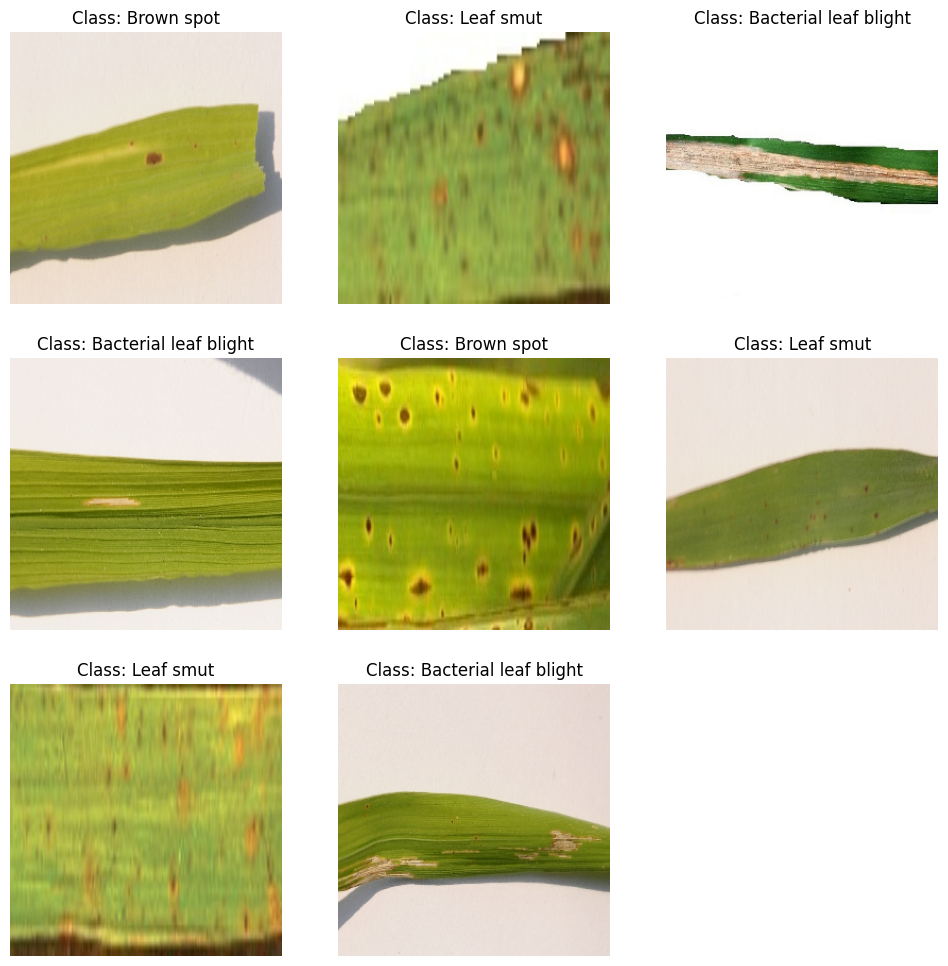

In [29]:
# Display images from the dataset
class_names = dataset.class_names
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(8):  # Assuming batch_size is 8
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis("off")
plt.show()

## ML Modelling

In [23]:
# creating an ML model
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_size, image_size, channels)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 32)       

### Model Overview:
* Model Name: Sequential_1
* Total Parameters: 51,363
* Trainable Parameters: 51,363
* Non-trainable Parameters: 0

#### Rescaling Layer (rescaling_1):

* Output Shape: (256, 256, 3)
* Purpose: Normalize pixel values to a scale between 0 and 1.

#### Convolutional Layer (conv2d_6):

* Output Shape: (254, 254, 32)
* Activation Function: ReLU
* Parameters: 896
*Purpose: Extract 32 features using a 3x3 kernel.

#### MaxPooling2D Layer (max_pooling2d_6):

* Output Shape: (127, 127, 32)
* Purpose: Downsample feature maps.

#### Additional Convolutional and MaxPooling2D Layers (conv2d_7 to max_pooling2d_11):

* Similar architecture to extract hierarchical features with decreasing spatial dimensions.

#### Flatten Layer (flatten_1):

*Output Shape: (128)
*Purpose: Flatten the feature maps into a 1D array.

#### Dense Layer (dense_2):

* Output Shape: (32)
* Activation Function: ReLU
* Parameters: 4,128
* Purpose: Introduce non-linearity to the network.

#### Output Dense Layer (dense_3):

* Output Shape: (3)
* Activation Function: Softmax
* Parameters: 99
* Purpose: Generate probability distribution over the three classes.

#### Training Considerations:
* Optimizer: Adam
* Loss Function: Sparse Categorical Crossentropy
* Metrics: Accuracy

In [24]:
# Compile the original model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
# Train the original model
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/50


12/12 [==============================] - 4s 160ms/step - loss: 1.1023 - accuracy: 0.3542 - val_loss: 1.0796 - val_accuracy: 0.7500
Epoch 2/50
12/12 [==============================] - 1s 108ms/step - loss: 1.0935 - accuracy: 0.3854 - val_loss: 1.0514 - val_accuracy: 0.7500
Epoch 3/50
12/12 [==============================] - 1s 125ms/step - loss: 1.0687 - accuracy: 0.4688 - val_loss: 0.9172 - val_accuracy: 0.5000
Epoch 4/50
12/12 [==============================] - 2s 126ms/step - loss: 1.0470 - accuracy: 0.5208 - val_loss: 0.8234 - val_accuracy: 0.5000
Epoch 5/50
12/12 [==============================] - 1s 122ms/step - loss: 0.9488 - accuracy: 0.6250 - val_loss: 0.7169 - val_accuracy: 0.7500
Epoch 6/50
12/12 [==============================] - 2s 126ms/step - loss: 0.8433 - accuracy: 0.6875 - val_loss: 0.6560 - val_accuracy: 0.8750
Epoch 7/50
12/12 [==============================] - 1s 122ms/step - loss: 0.7680 - accuracy: 0.6667 - val_loss: 0.6590 - val_accuracy: 0.7500
Epoch 8/50
12/12 

In [26]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

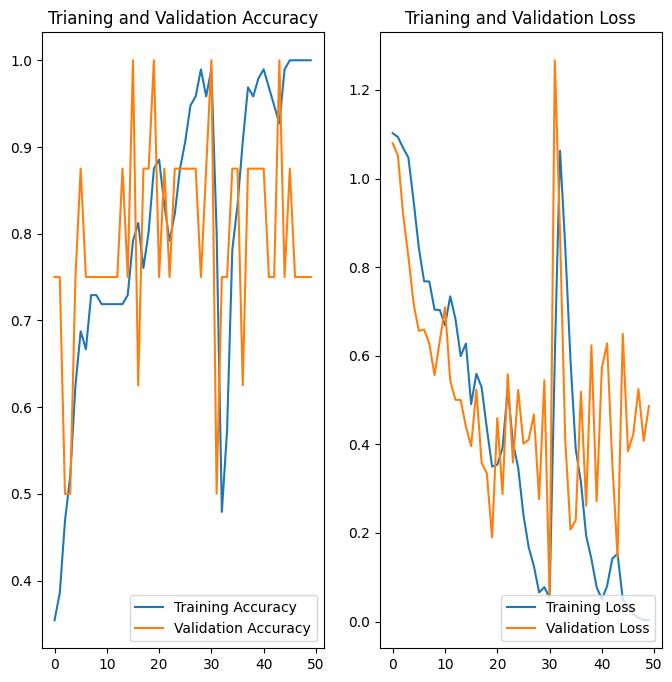

In [27]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training Loss')
plt.plot(range(epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()

The initial training phase exhibits a modest accuracy of approximately 35%, accompanied by a relatively high loss. Concurrently, the validation accuracy starts at around 75% in the first epoch. As training progresses, the model steadily improves, achieving nearly 100% accuracy on the training set by the end of the training period. The consistent decrease in training loss indicates effective learning from the provided training data.

However, the validation accuracy demonstrates fluctuations and tends to hover around 75% throughout the training process. This observation, coupled with the declining validation loss, suggests reasonable performance on unseen validation data but hints at the potential for overfitting.

The stark contrast between the training and validation accuracies implies overfitting, where the model excels at memorizing the intricacies of the training data but struggles to generalize to new, unseen data. Notably, in later epochs, the model showcases high confidence in predictions on the training set, yet this confidence does not translate well to the validation set.

To address overfitting and enhance generalization, incorporating techniques like dropout layers or other regularization methods is advisable. These methods introduce controlled randomness during training, preventing the model from relying too heavily on specific patterns within the training data.

In summary, while the model demonstrates proficiency in memorizing the training data, its ability to generalize is compromised. Introducing dropout layers is a strategic approach to mitigate overfitting, promoting better adaptability to diverse data and enhancing overall model performance.

## Improving results from initial model

In [33]:
# adding droput layers to reduce overfitting
model_with_dropout = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_size, image_size, channels)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [34]:
# Compile the model with dropout layers
model_with_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Train the model with dropout layers
history_with_dropout = model_with_dropout.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/50
12/12 [==============================] - 2s 73ms/step - loss: 1.2088 - accuracy: 0.2188 - val_loss: 1.0882 - val_accuracy: 0.7500
Epoch 2/50
12/12 [==============================] - 1s 62ms/step - loss: 1.1146 - accuracy: 0.3438 - val_loss: 1.0932 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 1s 66ms/step - loss: 1.0988 - accuracy: 0.3542 - val_loss: 1.0914 - val_accuracy: 0.7500
Epoch 4/50
12/12 [==============================] - 1s 71ms/step - loss: 1.0976 - accuracy: 0.3438 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 5/50
12/12 [==============================] - 1s 68ms/step - loss: 1.0938 - accuracy: 0.3646 - val_loss: 1.0995 - val_accuracy: 0.1250
Epoch 6/50
12/12 [==============================] - 1s 75ms/step - loss: 1.0955 - accuracy: 0.3542 - val_loss: 1.0999 - val_accuracy: 0.1250
Epoch 7/50
12/12 [==============================] - 1s 67ms/step - loss: 1.0914 - accuracy: 0.3333 - val_loss: 1.1018 - val_accuracy: 0.1250
Epoch 8/50
12

In [36]:
# evaluating the new model on testing dataset
model_with_dropout.evaluate(test_ds)

2/2 [==============================] - 0s 19ms/step - loss: 0.3192 - accuracy: 0.9333


[0.3192043900489807, 0.9333333373069763]

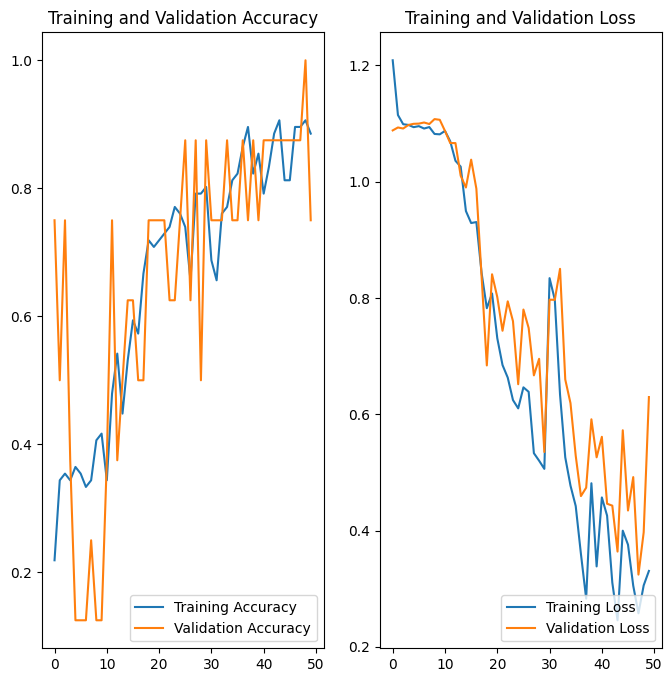

In [38]:
acc=history_with_dropout.history['accuracy']
val_acc = history_with_dropout.history['val_accuracy']

loss = history_with_dropout.history['loss']
val_loss = history_with_dropout.history['val_loss']

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training Loss')
plt.plot(range(epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()

Based on the training and validation results, the new model, which includes dropout layers for regularization, exhibits certain patterns and behaviors.

The model starts with a low training accuracy of approximately 22%, indicating that it initially struggles to capture patterns in the training data.
The validation accuracy begins at 75% in the first epoch, suggesting some early signs of generalization to unseen data.

Over subsequent epochs, the training accuracy gradually improves but remains relatively low, fluctuating between 33% and 48%. This indicates that the model struggles to fit the training data effectively.
Validation Performance:

The validation accuracy does not show a consistent improvement, fluctuating over epochs and not reaching high levels. This suggests that the model encounters challenges in generalizing well to validation data.

The training loss decreases gradually over epochs, indicating that the model is learning from the training data.
The validation loss, however, remains relatively high and does not show a consistent downward trend. This indicates challenges in minimizing the loss on unseen data.
The inclusion of dropout layers aims to prevent overfitting by randomly dropping connections during training. However, the model's struggle to fit the training data and limited improvement in validation accuracy suggest that the dropout layers might not be effectively regularizing the model.

#### Testing Performance:

Despite the challenges observed in training and validation, the model performs remarkably well on the testing dataset, achieving a final evaluation accuracy of 93.33%. This suggests that the model generalizes effectively to new, unseen data.